In [390]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Crear estructura de datos

Se genera una estructura de datos que simula la evolucion temporal de las imagenes (image_evol). Cada uno de los image_evol[i] es una imagen de un instante determinado. 

In [389]:
def distance(x,y,npx,npy):
    D=np.zeros((npx,npy))
    for i in range (D.shape[0]):
        for j in range (D.shape[1]):
            D[i,j]=np.sqrt((x-i)**2+(y-j)**2)
    return D    

def cluster_pixels(npixels,x,y,npx,npy):
    D=distance(x,y,npx,npy)
    pixels=np.zeros((1,2))
    for i in range (int(npixels)):
        xi=np.where(D==np.min(D))[0][0]
        yi=np.where(D==np.min(D))[1][0]
        pixels=np.vstack((pixels,[xi,yi]))
        D[xi,yi]=1e6
    pixels=np.delete(pixels,0,0)
    return pixels


def Add_cluster(n,Data,pxcapacity):
    npx,npy=Data.shape[0],Data.shape[1]
    x,y=npx*np.random.rand(),npy*np.random.rand()
    npixels=np.ceil(n/pxcapacity)
    pxs=cluster_pixels(npixels,x,y,npx,npy)
    n_rest=n
    for px in pxs:
        if n_rest>=pxcapacity:
            Data[int(px[0]),int(px[1])]+=pxcapacity
            n_rest-=pxcapacity
        else:
            Data[int(px[0]),int(px[1])]+=n_rest
    return Data

def Initial_distribution(Nclusters,Max_size=100,pxcapacity=2,npx=100,npy=100):
    distr=np.zeros((npx,npy))
    for i in range(Nclusters):
        n=np.random.rand()*Max_size//1
        distr=Add_cluster(n,distr,pxcapacity)
    return distr




def evolve(D,p):
    for i in range(distr.shape[0]):
        for j in range(distr.shape[1]):
            n0=D[i,j]
            ndie=0
            for ni in range (int(n0)):
                r=np.random.rand()
                if r<p:
                    ndie+=1
            D[i,j]-=ndie
    return D

def temporal_evolution(distr,p,Nt):
    data0=np.zeros_like(distr)
    data=np.stack((data0,distr))
    d=distr
    for i in range (Nt):
        d=evolve(d,p)
        data=np.append(data,[d],axis=0)
    data=np.delete(data,0,0)
    return data     

def images(data,noise=1,brightness=2):
    n0,n1,n2=data.shape[0],data.shape[1],data.shape[2]
    image_evol=data*brightness+noise*np.random.rand(n0,n1,n2)
    return image_evol

In [382]:
distr=Initial_distribution(20,Max_size=30)

In [383]:
data=temporal_evolution(distr,0.1,100)

In [384]:
image_evol=images(data,2)

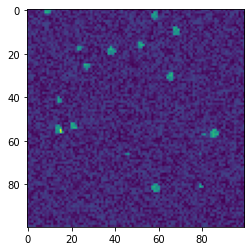

In [388]:
plt.imshow(image_evol[0])

# Analizar evolucion de los spots

In [391]:
def ROI(im,mask):
    label_image = label(mask)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(im)
    for region in regionprops(label_image):
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        print('minr = {}, minc = {}'.format(minr,minc))
        print('maxr = {}, maxc = {}'.format(maxr,maxc))

In [ ]:
def Mask(im,thresh):
    